# Matplotlib多图显示
首先导入库

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [31]:
x = np.arange(0,2,0.1)
y1,y2,y3,y4 = x, x**2, -x, np.sin(x)

# 一、Subplot子图

### 1. 均匀图中图

`plt.subplot(2,2,1)  # 或直接写221`

**作用：** 将当前绘图窗口分成2行2列，且当前绘图位置为1

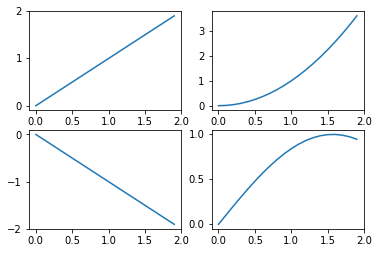

In [10]:
plt.figure()
plt.subplot(2,2,1)
plt.plot(x,y1)
plt.subplot(2,2,2)
plt.plot(x,y2)
plt.subplot(2,2,3)
plt.plot(x,y3)
plt.subplot(2,2,4)
plt.plot(x,y4)
plt.show()

### 2. 不均匀图中图

`plt.subplot(2,1,1)` - 先将窗口分为2行1列，在第一行绘图
`plt.subplot(2,3,4)` - 再将窗口分为2行3列，在第二行绘图

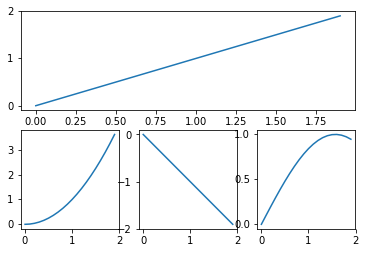

In [11]:
plt.figure()
plt.subplot(2,1,1)  # 也可以直接写211
plt.plot(x,y1)
plt.subplot(2,3,4)
plt.plot(x,y2)
plt.subplot(2,3,5)
plt.plot(x,y3)
plt.subplot(2,3,6)
plt.plot(x,y4)
plt.show()

# 二、subplots 

与 `subplot` 类似，不同之处是它会同时返回平分后的多个图像区句柄。可搭配 `plt.tight_layout()`，表示紧凑显示图像。

`f, ((ax11, ax12), (ax13, ax14)) = plt.subplots(2, 2, sharex=True, sharey=True)`

**参数：**

`2,2` - 将窗口分为2行2列

`sharex=True` - 共享x坐标轴

`sharey=True` - 共享y坐标轴

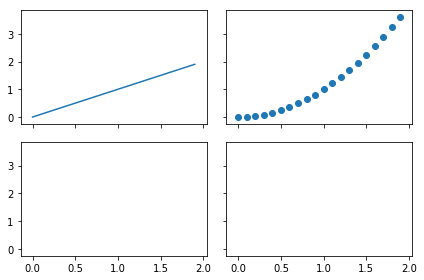

In [26]:
fig,((ax11,ax12),(ax13,ax14)) = plt.subplots(2,2,sharex=True,sharey=True)
ax11.plot(x,y1)
ax12.scatter(x,y2)
plt.tight_layout()  # 紧凑显示图像
plt.show()

# 三、subplot2grid 分格绘图

`subplot2grid()` 函数将窗口划分成网格，然后可在网格中框出任意大小的矩形绘图,如：

`axes = subplot2grid((3,3),(1,0),colspan=2,rowspan=2)`

**作用：** 将窗口分成 3\*3 的九宫格，然后以第二行第一个格子作为绘图区 `axes` 左上角，绘图区横向（col）和纵向（row）跨度都为两个格子。接下来可用 `axes.plot()` 绘图

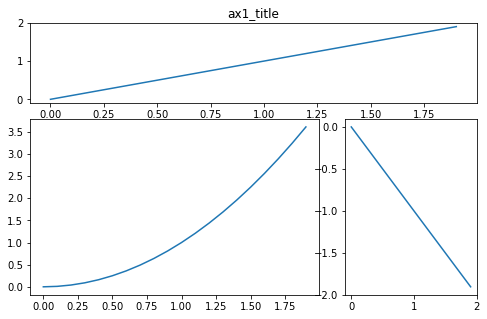

In [18]:
plt.figure(figsize=(8,5))
ax1 = plt.subplot2grid((3,3),(0,0),colspan=3)
ax1.plot(x,y1)              # 绘制第一幅图
ax1.set_title("ax1_title")  # 设置第一幅图的标题
ax2 = plt.subplot2grid((3,3),(1,0),colspan=2,rowspan=2)
ax2.plot(x,y2)
ax3 = plt.subplot2grid((3,3),(1,2),rowspan=2)
ax3.plot(x,y3)
plt.show()

# 四、gridspec 分格绘图

首先导入库 `matplotlib.gridspec`

`gs = gridspec.GridSpec(3,3)` 将图像窗口分为 `3*3`，接着 `gs` 可以使用切片操作选取网格范围，并搭配 `plt.subplot` 绘图，例如：

`ax1 = plt.subplot(gs[0,:2])` 表示图 `ax1` 占第0行和第0,1列

`ax2 = plt.subplot(gs[1, -1])` 表示图 `ax2` 占第1行，最后1列

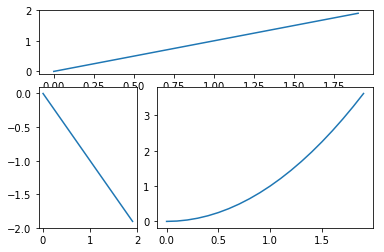

In [20]:
import matplotlib.gridspec as gridspec
# 划分网格
plt.figure()
gs = gridspec.GridSpec(3,3)
# 绘图
ax1 = plt.subplot(gs[0,:])
ax2 = plt.subplot(gs[1:,1:])
ax3 = plt.subplot(gs[1:,0])
ax1.plot(x,y1)
ax2.plot(x,y2)
ax3.plot(x,y3)
plt.show()

# 五、图中图 add_axes()

### 法一：

`ax1 = fig.add_axes([left,bottom,width,height])`

**作用：** 在图像窗口 `fig` 中添加一个 `axes`，其中 `left,bottom` 为左下角坐标，取值范围是 `0~1` ，`width,height` 是这张图的长宽。

### 法二：

`plt.axes([left,bottom,width,height])`

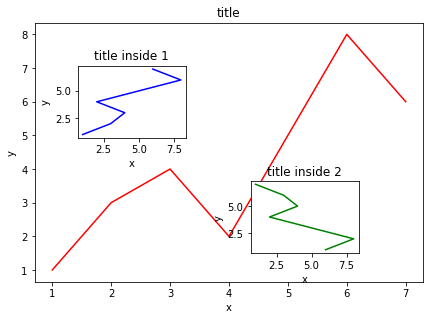

In [30]:
# 创建数据
X = [1, 2, 3, 4, 5, 6, 7]
Y = [1, 3, 4, 2, 5, 8, 6]
# 绘图
fig = plt.figure()
# 法一
ax1 = fig.add_axes([0.1,0.1,0.9,0.9])
ax1.plot(X, Y, 'r')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('title')

ax2 = fig.add_axes([0.2, 0.6, 0.25, 0.25])
ax2.plot(Y, X, 'b')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('title inside 1')
# 法二
plt.axes([0.6, 0.2, 0.25, 0.25])
plt.plot(Y[::-1], X, 'g') # 注意对y进行了逆序处理
plt.xlabel('x')
plt.ylabel('y')
plt.title('title inside 2')

plt.show()

# 六、次坐标轴 axes.twinx

有时候我们会用到次坐标轴，即在同个图上有第2个y轴存在。

`ax2 = ax1.twinx()`

**作用：**得到 `ax1` 的镜像坐标系 `ax2`。

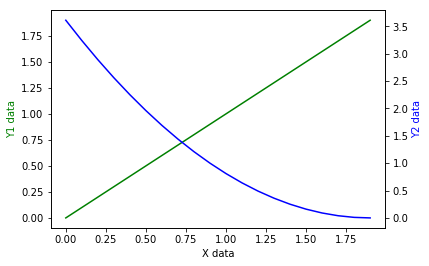

In [38]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(x, y1, 'g-')   # green, solid line
ax1.set_ylabel('Y1 data', color='g')

ax2.plot(x[::-1], y2, 'b-') # blue
ax2.set_ylabel('Y2 data', color='b')

ax1.set_xlabel('X data')

plt.show()